<a href="https://colab.research.google.com/github/SheilaLiborio/regressao_linear_carros_usados/blob/main/Desafio_carros_usados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 4: Venda de Veículos Usados
Dificuldade: Média.

Você trabalha em uma empresa de revenda de veículos usados. O sucesso
da empresa depende fortemente da precificação adequada dos veículos.
Caso o preço seja muito alto, o carro não vende. Se for muito baixo, a
empresa perde dinheiro.
Como parte da equipe de dados, você recebeu uma base de dados com
informações sobre carros vendidos nos últimos anos, com o objetivo de
entender quais fatores mais impactam no preço de venda.
A empresa espera que você identifique as variáveis mais relevantes e
proponha uma análise baseada em correlações e modelos preditivos
simples.
Base de Dados: desafio_carros_usados.csv
* id: Identificador único do veículo
* make: Marca do carro (ex: Ford, Toyota)
* model: Modelo do carro
* year: Ano de fabricação
* price: Preço de venda do carro
* mileage: Quilometragem (km rodados)
* engine_ize: Tamanho do motor (em litros)
* fuel_ type: Tipo de combustível (gasolina, diesel, elétrico)
* transmission: Tipo de transmissão (manual, automática)
* doors: Número de portas
* color: Cor do carro
* tax: Taxa anual de imposto veicular
* mpg: Milhas por Galão(indicador de eficiência de combustível)
* sold_ date: Data de venda do veículo



## Tarefa:
### 1. Análise de Correlação

* Calcule a correlação entre as variáveis numéricas e o preço do carro
(price).
* Quais variáveis estão mais correlacionadas com o preço?
* Quais estão menos correlacionadas?

## Análise preliminar dos dados

In [ ]:
# importando os pacotes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# lendo dos dados csv
df_carros= pd.read_csv('desafio_carros_usados.csv', sep = ",")

In [ ]:
### leitura das 10 primeiras linhas
df_carros.head(10)

id        make    model  year  price  mileage  engine_size fuel_type  \
0   1  Volkswagen  Model B  2022  23859    94811          3.6    Diesel   
1   2   Chevrolet  Model A  2008  16953   128028          4.9    Diesel   
2   3         BMW  Model B  2006  12332    49178          4.1    Diesel   
3   4   Chevrolet  Model B  2018  18475    42821          2.7    Hybrid   
4   5   Chevrolet  Model C  2017  12129   192799          2.8  Gasoline   
5   6      Toyota  Model D  2016  24551    26999          3.5  Electric   
6   7         BMW  Model D  2011  31428    48712          3.7  Electric   
7   8         BMW  Model B  2006  18173   181244          3.0  Electric   
8   9         BMW  Model C  2017  26611    43722          3.6  Gasoline   
9  10   Chevrolet  Model B  2018  15175    20625          1.1  Electric   

  transmission  doors   color  tax   mpg   sold_date  
0       Manual      2    Grey  288  39.2  2023-10-11  
1       Manual      5     Red  339  15.3  2021-04-22  
2    Automatic      4     Red  458  37.2  2020-05-04  
3       Manual      5  Silver  486  43.7  2021-06-20  
4       Manual      4  Silver  295  19.1  2021-12-06  
5       Manual      5   White  396  44.7  2023-11-26  
6    Automatic      3    Grey  264  11.3  2021-06-14  
7    Automatic      3     Red  406  46.5  2022-02-24  
8       Manual      2     Red  370  14.7  2020-09-10  
9       Manual      4     Red  107  35.8  2020-04-30

In [ ]:
# Verificando estrutura e possíveis problemas
df_carros.info()
df_carros.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1000 non-null   int64  
 1   make          1000 non-null   object 
 2   model         1000 non-null   object 
 3   year          1000 non-null   int64  
 4   price         1000 non-null   int64  
 5   mileage       1000 non-null   int64  
 6   engine_size   1000 non-null   float64
 7   fuel_type     1000 non-null   object 
 8   transmission  1000 non-null   object 
 9   doors         1000 non-null   int64  
 10  color         1000 non-null   object 
 11  tax           1000 non-null   int64  
 12  mpg           1000 non-null   float64
 13  sold_date     1000 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 109.5+ KB


id              0
make            0
model           0
year            0
price           0
mileage         0
engine_size     0
fuel_type       0
transmission    0
doors           0
color           0
tax             0
mpg             0
sold_date       0
dtype: int64

In [ ]:
# quantidade de observacoes (linhas e colunas)
df_carros.shape

(1000, 14)

## Correlação

- Excluindo a coluna de id, que não é relevante para a análise

In [ ]:
df_carros.drop("id", axis = 1, inplace = True)

In [ ]:
# Matriz de correlação com colunas numéricas
correlacoes = df_carros.select_dtypes(include='number').corr()

In [ ]:
correlacoes

year     price   mileage  engine_size     doors       tax  \
year         1.000000 -0.033064 -0.024010    -0.033655 -0.001858 -0.048300   
price       -0.033064  1.000000  0.011115    -0.000181  0.033304  0.009043   
mileage     -0.024010  0.011115  1.000000     0.013454  0.043200  0.054321   
engine_size -0.033655 -0.000181  0.013454     1.000000 -0.032265 -0.021244   
doors       -0.001858  0.033304  0.043200    -0.032265  1.000000  0.044555   
tax         -0.048300  0.009043  0.054321    -0.021244  0.044555  1.000000   
mpg         -0.048958 -0.008201 -0.034972    -0.074234 -0.051233 -0.007986   

                  mpg  
year        -0.048958  
price       -0.008201  
mileage     -0.034972  
engine_size -0.074234  
doors       -0.051233  
tax         -0.007986  
mpg          1.000000

In [ ]:
# Exibindo a correlação entre as variáveis e o preço
correlacao_com_preco = correlacoes['price'].sort_values(ascending=False)

correlacao_com_preco

price          1.000000
doors          0.033304
mileage        0.011115
tax            0.009043
engine_size   -0.000181
mpg           -0.008201
year          -0.033064
Name: price, dtype: float64

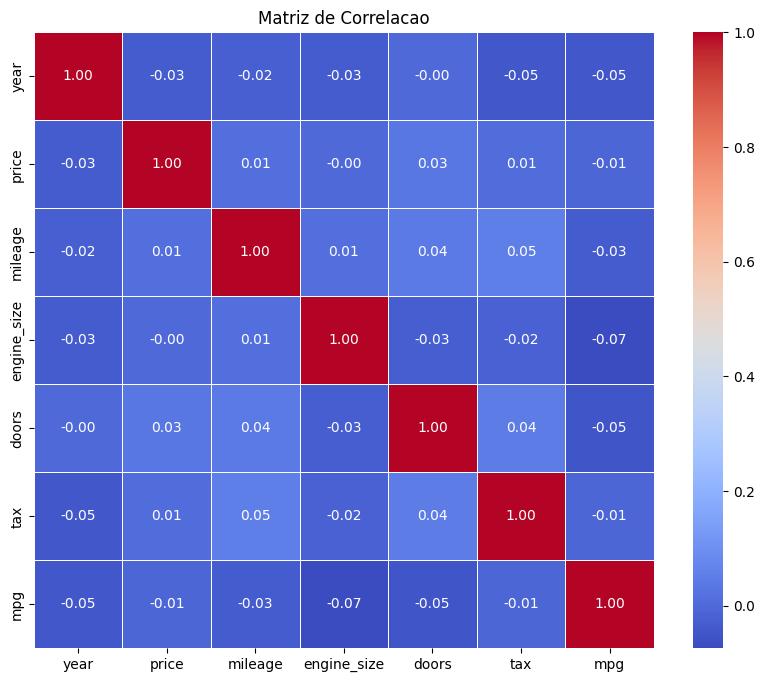

In [ ]:
# Plot do mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

## Análise:
- Nenhuma variável apresenta uma correlação forte com o preço.
- As mais correlacionadas positivamente (embora muito fracas) são:

  - doors (0.03)
  - tax (0.01)
  - mileage (0.01)

- Variáveis menos correlacionadas com o preço:
  - year (-0.0331)
  - mpg (-0.0082)
  - engine_size (-0.0002)

## Grafico de dispersao (PAIRPLOT) entre as numéricas

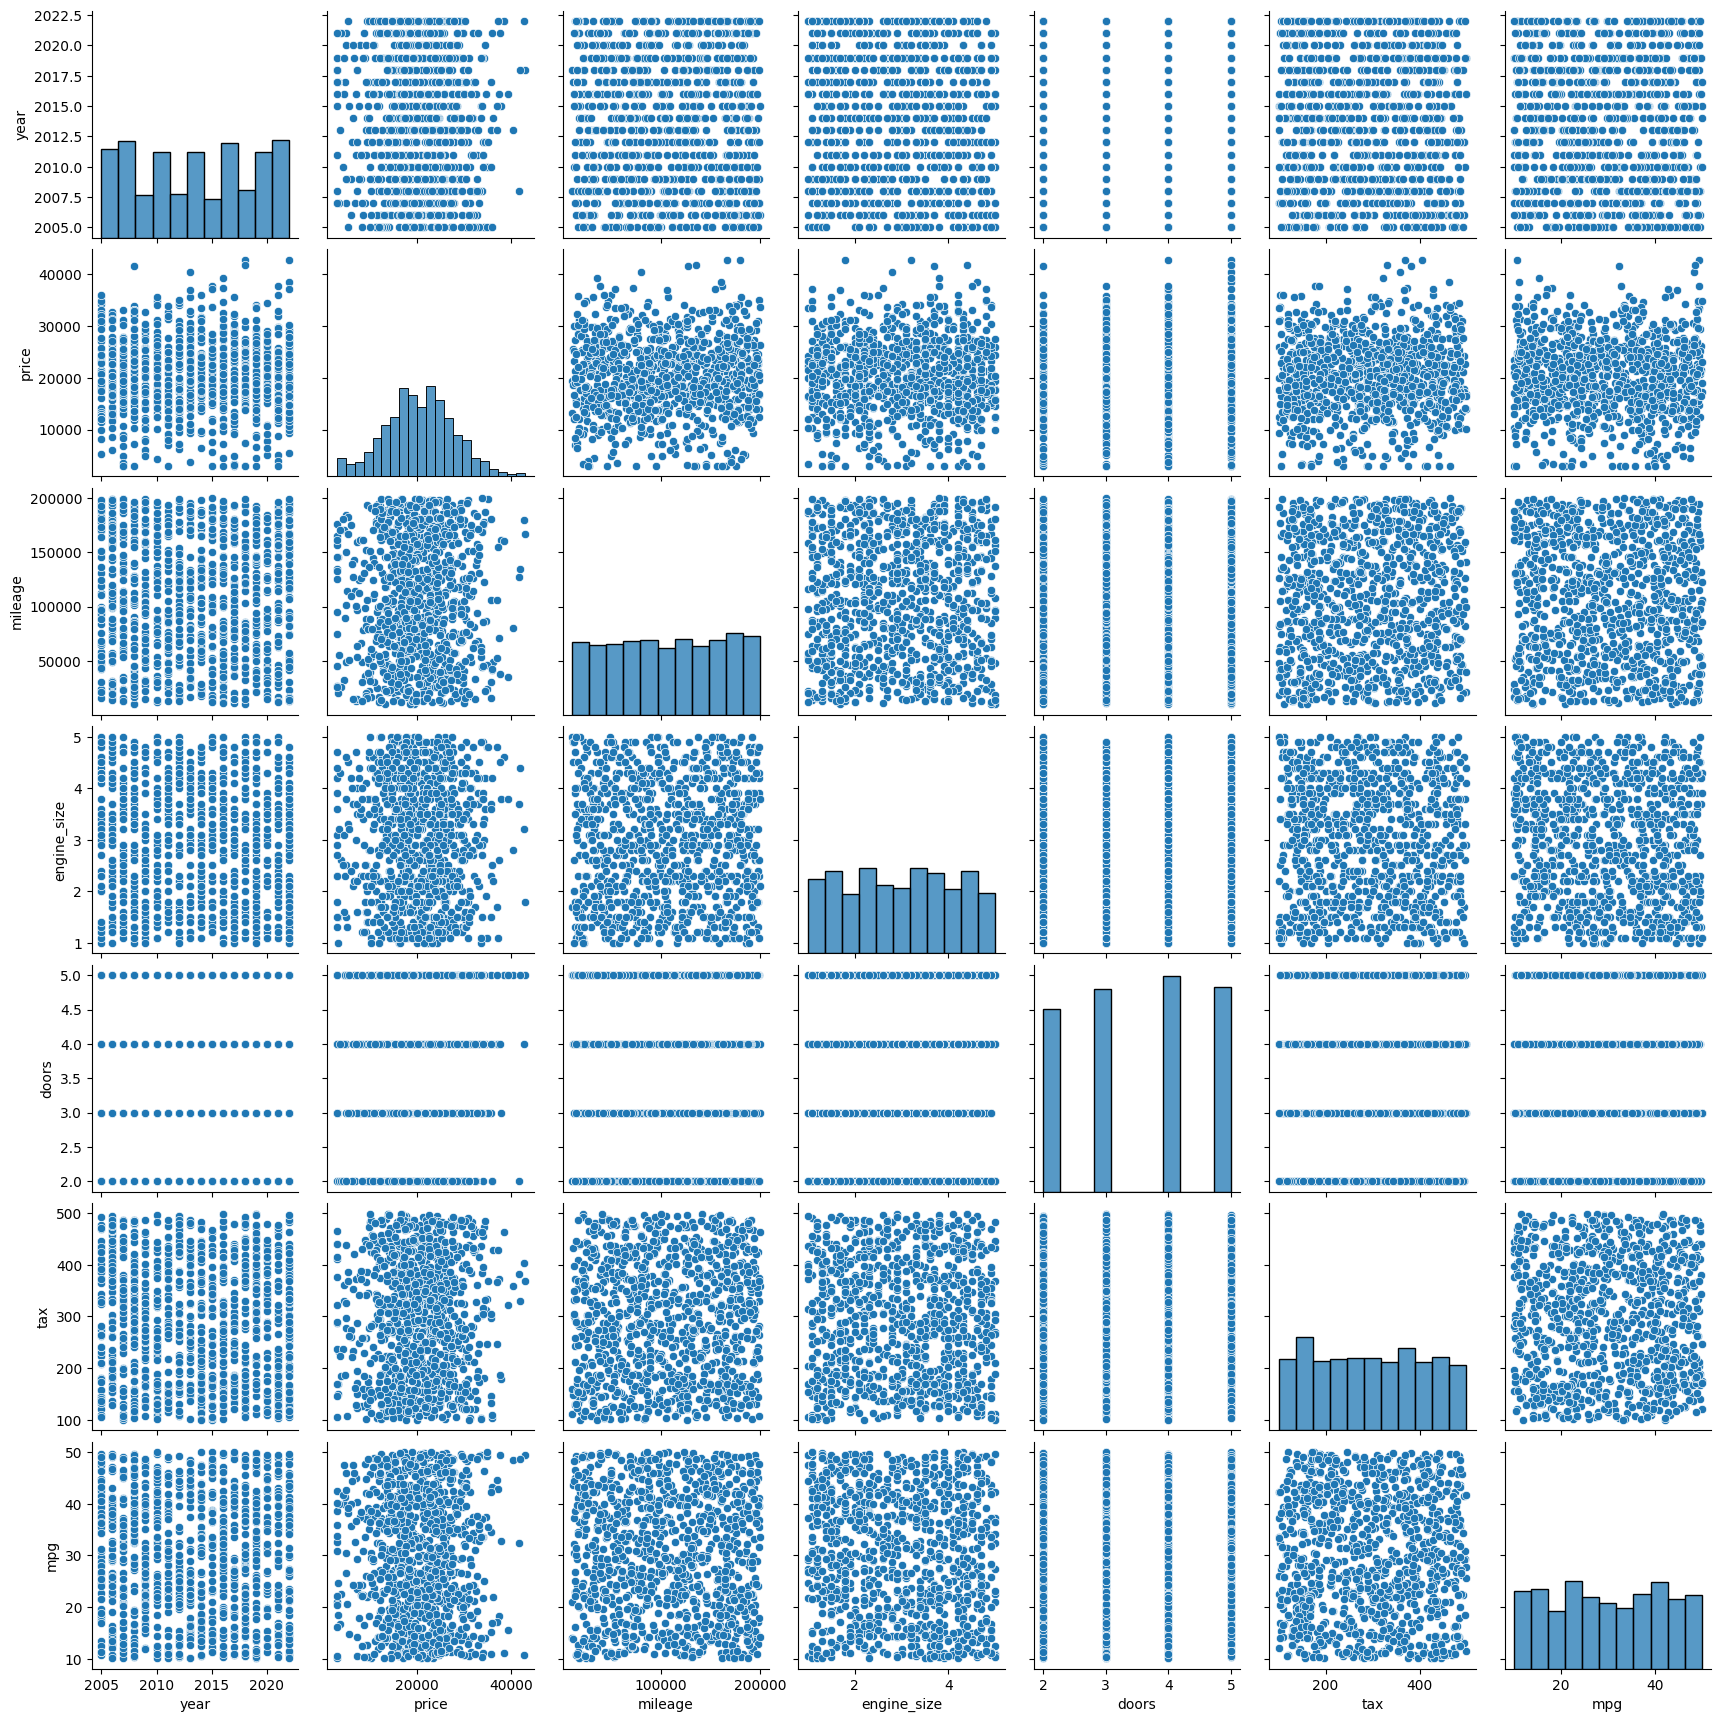

In [ ]:
sns.pairplot(df_carros.select_dtypes(include='number'), diag_kind='hist')

## Realizando a combinação de variáveis para identificar outros padrões que influenciam o preço dos carros usados

- Verificando a "Idade" do carro, no momento da venda.

In [ ]:
# Converter a coluna 'sold_date' para o tipo datetime
df_carros['sold_date'] = pd.to_datetime(df_carros['sold_date'], format='%Y-%m-%d')

# Extrair o ano da venda
df_carros['ano_venda'] = df_carros['sold_date'].dt.year

# Calcular a idade do carro no momento da venda
df_carros['idade_ano_venda'] = df_carros['ano_venda'] - df_carros['year']

- Um carro com baixa quilometragem  pode mantê-lo mais caro.

In [ ]:
df_carros["km_por_ano"] = df_carros["mileage"] / df_carros["idade_ano_venda"]

In [ ]:
# Atualizando a seleção das colunas numéricas
num_carros = df_carros.select_dtypes(include=['float64', 'int64'])
correlacao = num_carros.corr()
correlacao

year     price   mileage  engine_size     doors  \
year             1.000000 -0.033064 -0.024010    -0.033655 -0.001858   
price           -0.033064  1.000000  0.011115    -0.000181  0.033304   
mileage         -0.024010  0.011115  1.000000     0.013454  0.043200   
engine_size     -0.033655 -0.000181  0.013454     1.000000 -0.032265   
doors           -0.001858  0.033304  0.043200    -0.032265  1.000000   
tax             -0.048300  0.009043  0.054321    -0.021244  0.044555   
mpg             -0.048958 -0.008201 -0.034972    -0.074234 -0.051233   
idade_ano_venda -0.978803  0.036276  0.011704     0.028537  0.003101   
km_por_ano       0.196376 -0.026440  0.196818     0.011841 -0.011498   

                      tax       mpg  idade_ano_venda  km_por_ano  
year            -0.048300 -0.048958        -0.978803    0.196376  
price            0.009043 -0.008201         0.036276   -0.026440  
mileage          0.054321 -0.034972         0.011704    0.196818  
engine_size     -0.021244 -0.074234         0.028537    0.011841  
doors            0.044555 -0.051233         0.003101   -0.011498  
tax              1.000000 -0.007986         0.045188    0.057187  
mpg             -0.007986  1.000000         0.053086    0.045478  
idade_ano_venda  0.045188  0.053086         1.000000   -0.170571  
km_por_ano       0.057187  0.045478        -0.170571    1.000000

In [ ]:
# Exibindo a nova correlação com 'price'
correlacao_com_preco = correlacao['price'].drop('price').sort_values(ascending=False)
top5_correlacoes=correlacao_com_preco.head(5)
top5_correlacoes

idade_ano_venda    0.036276
doors              0.033304
mileage            0.011115
tax                0.009043
engine_size       -0.000181
Name: price, dtype: float64

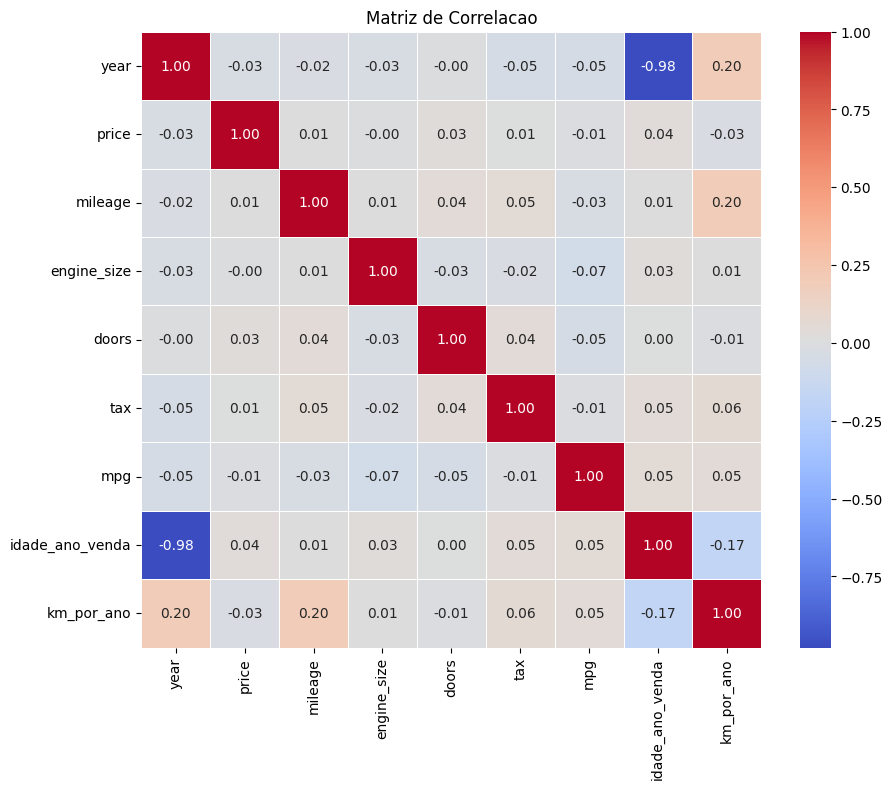

In [ ]:
# Plot do mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

- A variável idade_ano_venda tem correlação de 0.036 com o preço, indicando relação fraca.
    - A variável year tem correlação -0.98 com idade_ano_venda —  sinal claro de *multicolinearidade*. São praticamente a mesma informação.
-  Doors tem 0.033, levemente positiva. Sugerindo que carros com mais portas tendem a ter um preço um pouco maior, embora o efeito seja pequeno.
-  Mileage (0.011), tax (0.009), engine_size (-0.000) e mpg (-0.008) têm correlações praticamente nulas com o preço.
- Km_por_ano apresenta -0.026, sugerindo que carros mais rodados por ano valem um pouco menos.
- Year tem -0.033, o que é inesperado, já que carros mais novos não mostram preços maiores nesta amostra.

## Grafico de dispersao (PAIRPLOT) entre as numéricas com as novas combinacoes de dados  

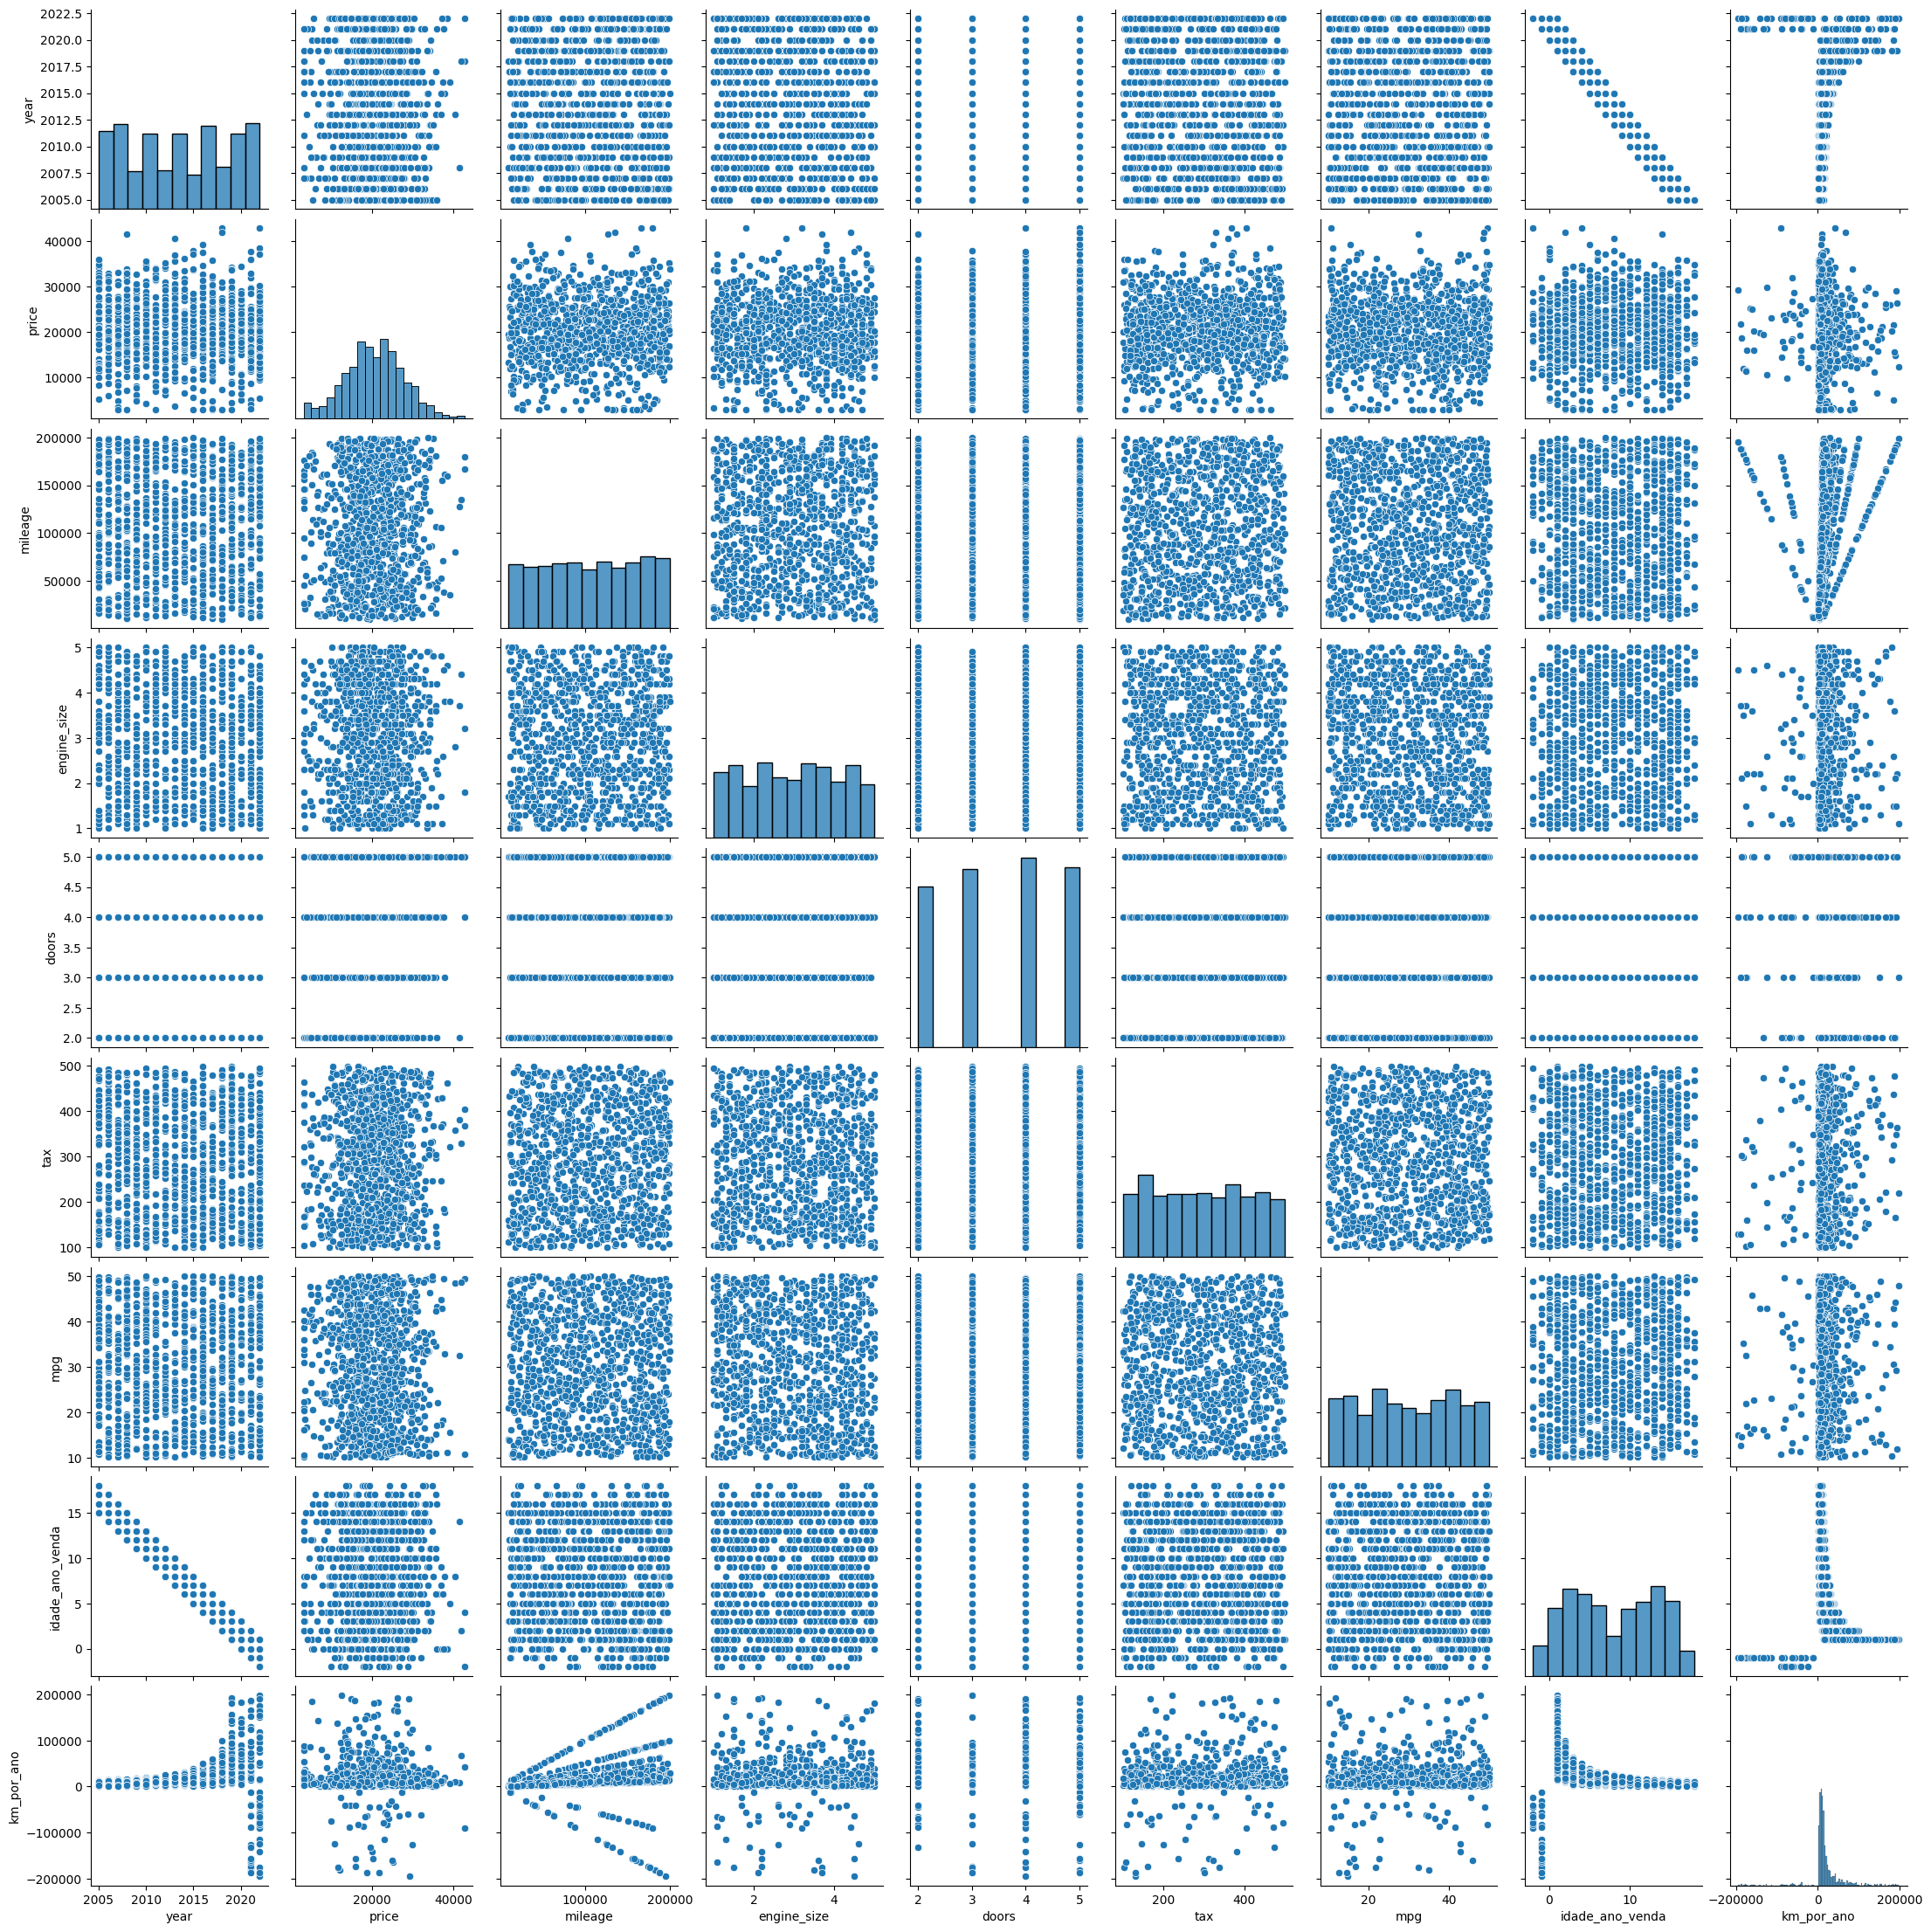

In [ ]:
sns.pairplot(num_carros, diag_kind='hist')

## 2. Análise das 5 Variáveis Mais Correlacionadas
* Para as cinco variáveis com maior correlação com o preço:
    1. Plote histograma e boxplot de cada variável.
    2. Plote o scatterplot (gráfico de dispersão), com price no eixo Y e a
variável no eixo X.
    3. Faça uma regressão linear simples, utilizando cada variável como
preditora (X) e o preço como resposta (Y). Interprete os coeficientes e
o R².

## Analisando variáveis categoricas

In [ ]:
df_carros.columns

Index(['make', 'model', 'year', 'price', 'mileage', 'engine_size', 'fuel_type',
       'transmission', 'doors', 'color', 'tax', 'mpg', 'sold_date',
       'ano_venda', 'idade_ano_venda', 'km_por_ano'],
      dtype='object')

In [ ]:
df_carros.drop('sold_date', 'ano_venda', 'idade_ano_venda', 'km_por_ano', axis = 1, inplace = True)

## Verificando cardinalidade

In [ ]:

df_carros['make'].nunique()

4

In [ ]:
df_carros['model'].nunique()

4

In [ ]:
df_carros['transmission'].nunique()

2

In [ ]:
df_carros['fuel_type'].nunique()

4

In [ ]:
df_carros['fuel_type'].value_counts()

fuel_type
Diesel      262
Hybrid      254
Gasoline    247
Electric    237
Name: count, dtype: int64

In [ ]:
df_carros['transmission'].value_counts()

transmission
Manual       502
Automatic    498
Name: count, dtype: int64

## One-hot encode das variáveis categóricas (colunas numéricas binárias (0 ou 1)) + Correlacao de Pearson

In [ ]:
df_encoded = pd.get_dummies(df_carros[['make', 'transmission', 'fuel_type', 'color']], drop_first=True)

# Adiciona o preço
df_encoded['price'] = df_carros['price']

# Calcula correlação com o preço (Correlação de Pearson)
correlations = df_encoded.corr()['price'].sort_values(ascending=False)
print("\nCorrelação das categorias (one-hot) com o preço:")
print(correlations.head(6))  # Mostra as 5 categorias mais correlacionadas


Correlação das categorias (one-hot) com o preço:
price                  1.000000
make_Chevrolet         0.063607
fuel_type_Electric     0.049832
color_White            0.031740
transmission_Manual    0.030486
make_Ford              0.013214
Name: price, dtype: float64


In [ ]:
df_carros

make    model  year  price  mileage  engine_size fuel_type  \
0    Volkswagen  Model B  2022  23859    94811          3.6    Diesel   
1     Chevrolet  Model A  2008  16953   128028          4.9    Diesel   
2           BMW  Model B  2006  12332    49178          4.1    Diesel   
3     Chevrolet  Model B  2018  18475    42821          2.7    Hybrid   
4     Chevrolet  Model C  2017  12129   192799          2.8  Gasoline   
..          ...      ...   ...    ...      ...          ...       ...   
995       Honda  Model D  2011  33928    85910          3.8    Diesel   
996   Chevrolet  Model C  2021  23709   145747          4.6  Gasoline   
997        Ford  Model A  2021  22885    87986          3.3  Gasoline   
998        Ford  Model B  2006  31124    20068          1.5    Hybrid   
999   Chevrolet  Model C  2010  21793    64460          1.5  Electric   

    transmission  doors   color  tax   mpg  
0         Manual      2    Grey  288  39.2  
1         Manual      5     Red  339  15.3  
2      Automatic      4     Red  458  37.2  
3         Manual      5  Silver  486  43.7  
4         Manual      4  Silver  295  19.1  
..           ...    ...     ...  ...   ...  
995       Manual      4   Black  305  21.7  
996    Automatic      3     Red  204  41.9  
997       Manual      4    Blue  417  41.3  
998    Automatic      5    Grey  390  24.1  
999    Automatic      3     Red  349  22.0  

[1000 rows x 12 columns]

In [ ]:
df_encoded

make_Chevrolet  make_Ford  make_Honda  make_Toyota  make_Volkswagen  \
0             False      False       False        False             True   
1              True      False       False        False            False   
2             False      False       False        False            False   
3              True      False       False        False            False   
4              True      False       False        False            False   
..              ...        ...         ...          ...              ...   
995           False      False        True        False            False   
996            True      False       False        False            False   
997           False       True       False        False            False   
998           False       True       False        False            False   
999            True      False       False        False            False   

     transmission_Manual  fuel_type_Electric  fuel_type_Gasoline  \
0                   True               False               False   
1                   True               False               False   
2                  False               False               False   
3                   True               False               False   
4                   True               False                True   
..                   ...                 ...                 ...   
995                 True               False               False   
996                False               False                True   
997                 True               False                True   
998                False               False               False   
999                False                True               False   

     fuel_type_Hybrid  color_Blue  color_Grey  color_Red  color_Silver  \
0               False       False        True      False         False   
1               False       False       False       True         False   
2               False       False       False       True         False   
3                True       False       False      False          True   
4               False       False       False      False          True   
..                ...         ...         ...        ...           ...   
995             False       False       False      False         False   
996             False       False       False       True         False   
997             False        True       False      False         False   
998              True       False        True      False         False   
999             False       False       False       True         False   

     color_White  price  
0          False  23859  
1          False  16953  
2          False  12332  
3          False  18475  
4          False  12129  
..           ...    ...  
995        False  33928  
996        False  23709  
997        False  22885  
998        False  31124  
999        False  21793  

[1000 rows x 15 columns]

- make_Chevrolet: quando o carro é da Chevrolet, há uma leve tendência de o preço ser mais alto do que em outras marcas (em média), mas o efeito é pequeno.
- fuel_type_Electric: carros elétricos têm uma tendência de preço um pouco maior.
- color_White: carros brancos, levemente associados a preços maiores.
- transmission_Manual: transmissão manual está levemente ligada a preços maiores (o que pode parecer contraintuitivo; vale verificar no boxplot).
- make_Ford: presença da marca Ford tem efeito quase neutro.

## TOP 5 Variáveis mais correlacionadas (Numéricas e Categoricas)

    - make_Chevrolet         0.063607
    - fuel_type_Electric     0.049832
    - color_White            0.031740
    - transmission_Manual    0.030486
    - doors                  0.033304

## Bloxplot

In [ ]:
# Filtra apenas os carros Chevrolet
df_chevrolet = df_carros[df_carros['make'] == 'Chevrolet']

# Filtra apenas os carros Eletricos
df_eletric = df_carros[df_carros['fuel_type'] == 'Electric']

# Filtra apenas os carros Brancos
df_white = df_carros[df_carros['color'] == 'White']

# Filtra apenas os carros transmissao Manual
df_manual = df_carros[df_carros['transmission'] == 'Manual']

# Filtra apenas a coluna Portas
df_doors = df_carros[['doors', 'price']]

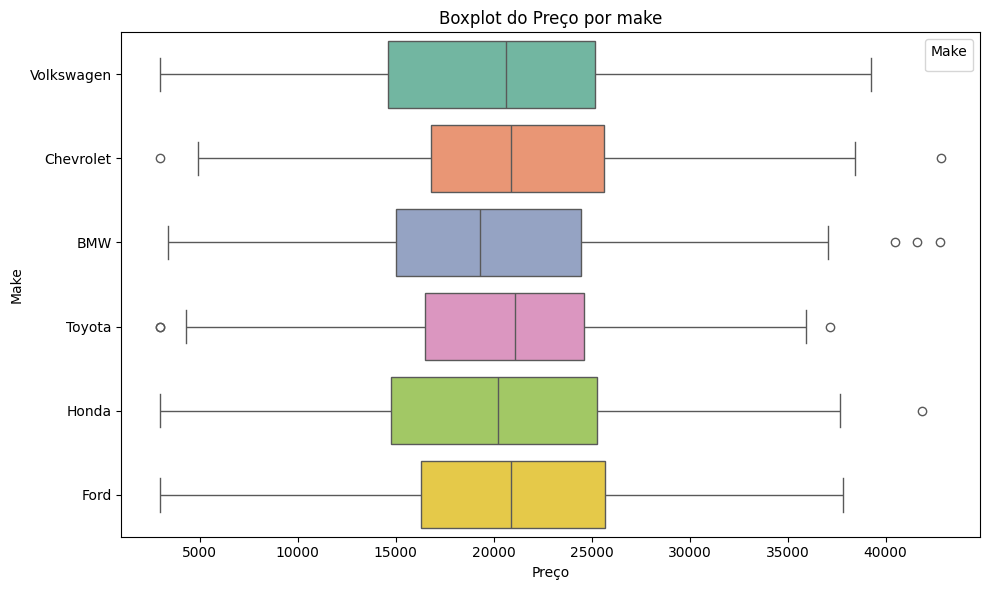

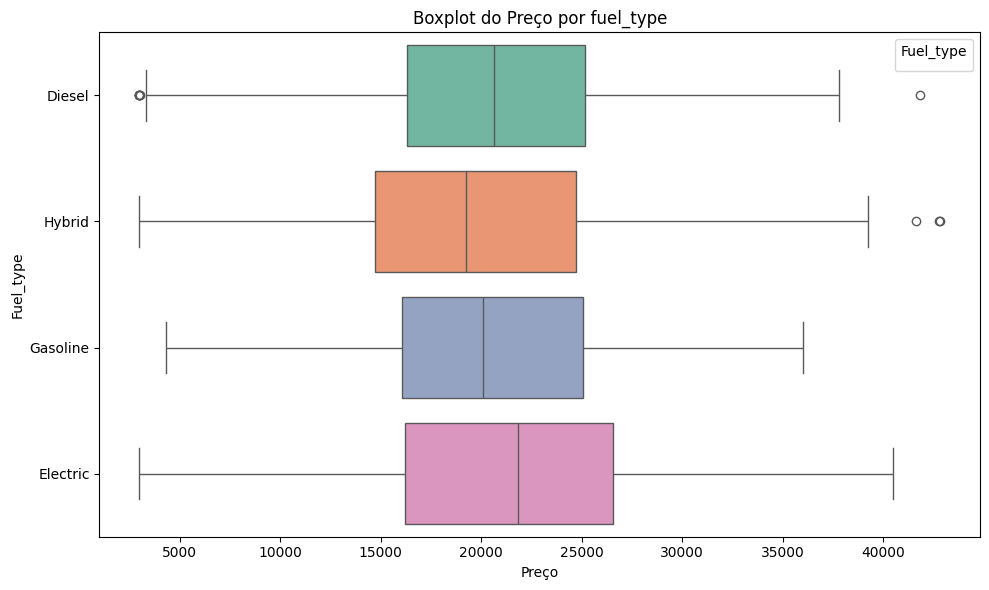

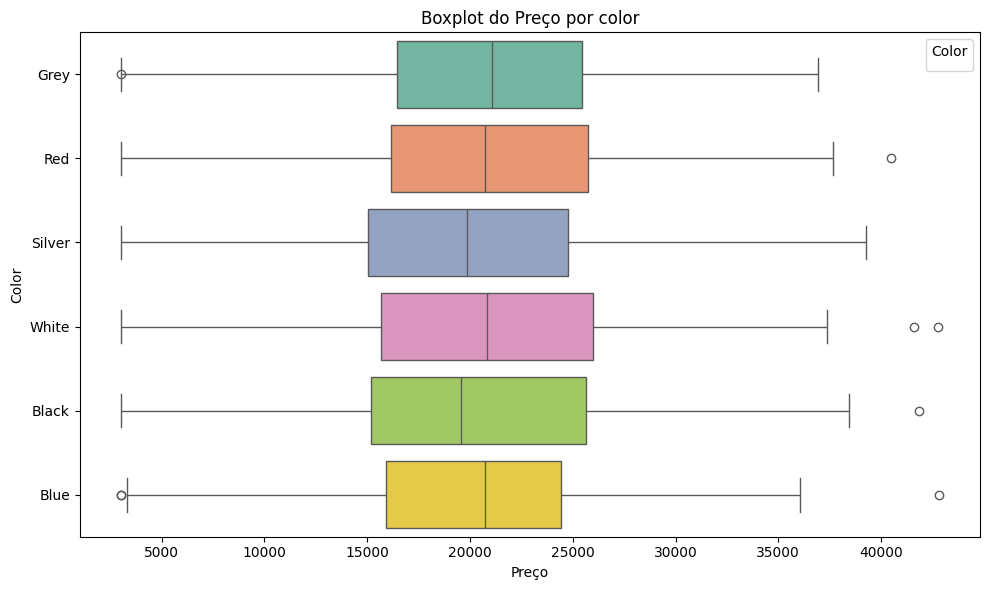

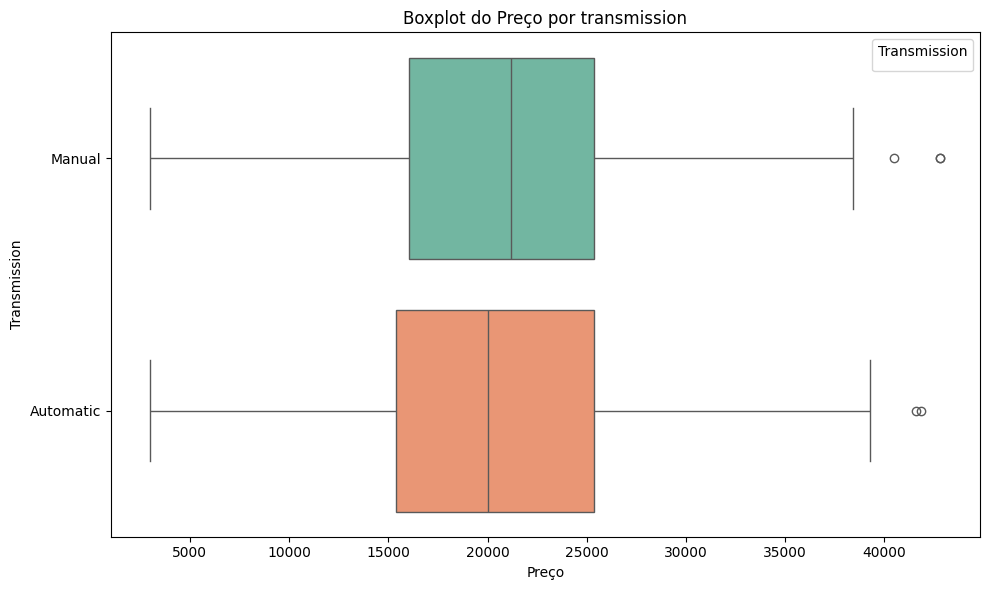

Text(0.5, 1.0, 'Valor do carro x Numero de portas')

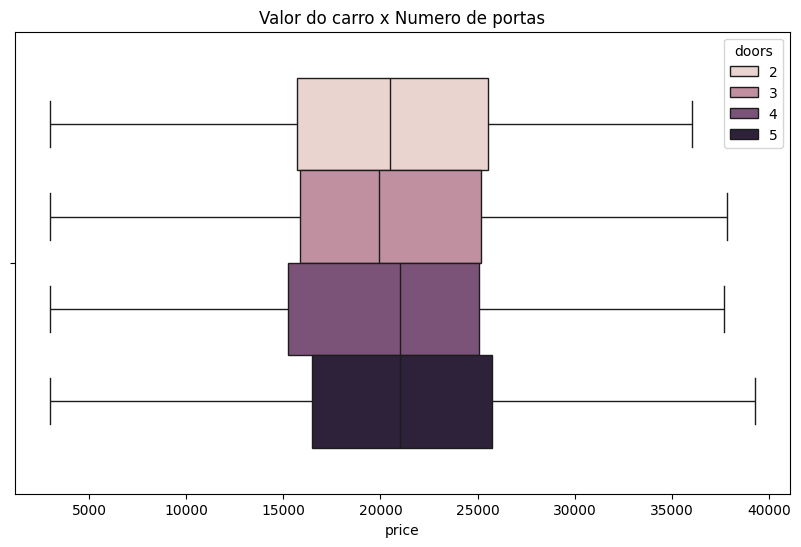

In [ ]:
variaveis = ['make', 'fuel_type', 'color', 'transmission']

# Cria um gráfico para cada variável categórica

for var in variaveis:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_carros, y=var, x='price', palette='Set2')
    plt.title(f'Boxplot do Preço por {var}')
    plt.xlabel('Preço')
    plt.ylabel(var.capitalize())
    plt.legend(title=var.capitalize(), loc='best')  # a legenda será baseada nas cores do eixo y
    plt.tight_layout()
    plt.show()

# bloxplot da coluna Doors
plt.figure(figsize=(10, 6))
sns.boxplot(df_carros, x="price", hue="doors", showfliers = False).set_title('Valor do carro x Numero de portas')



## Histogramas

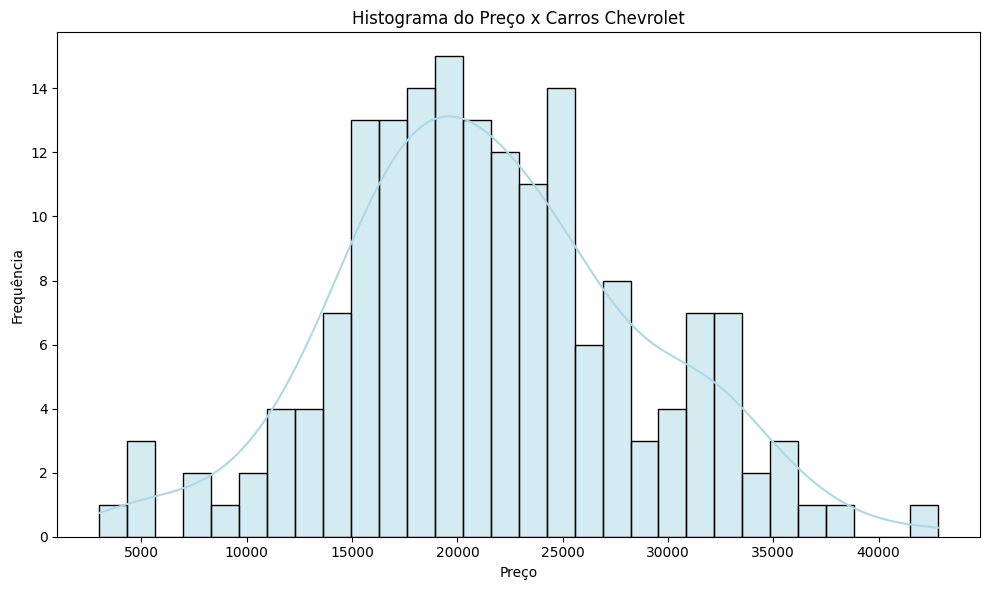

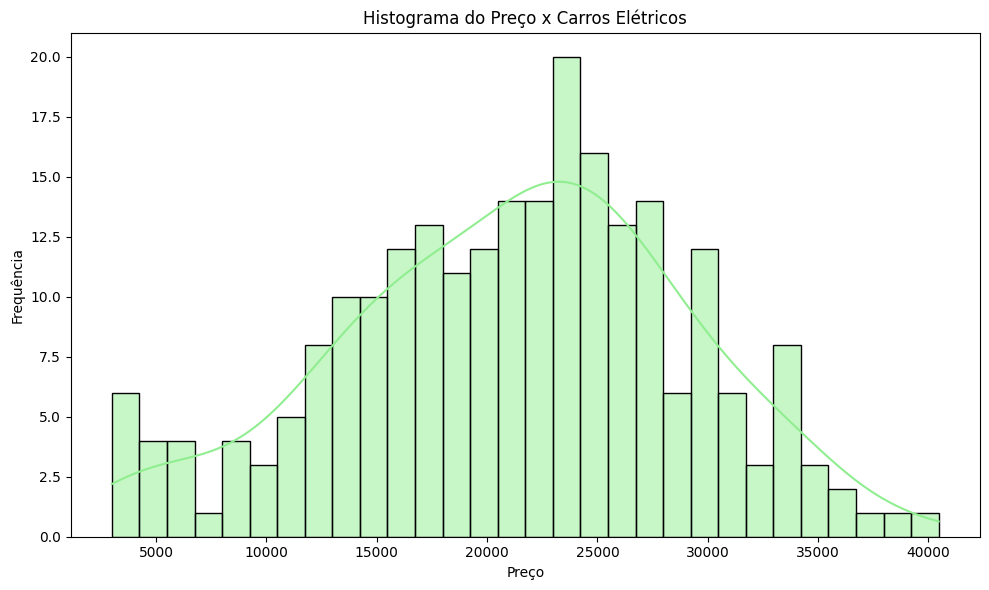

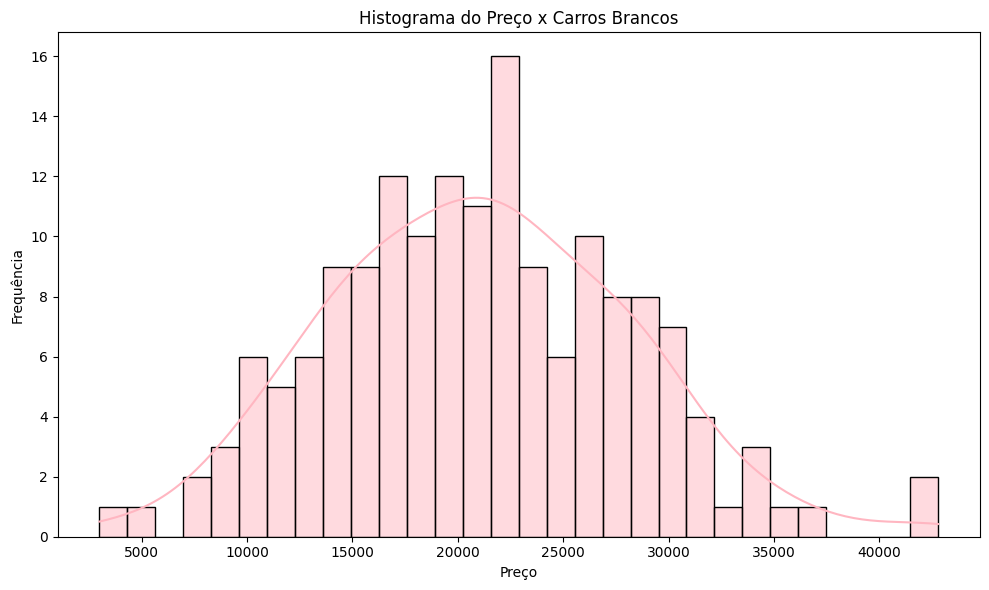

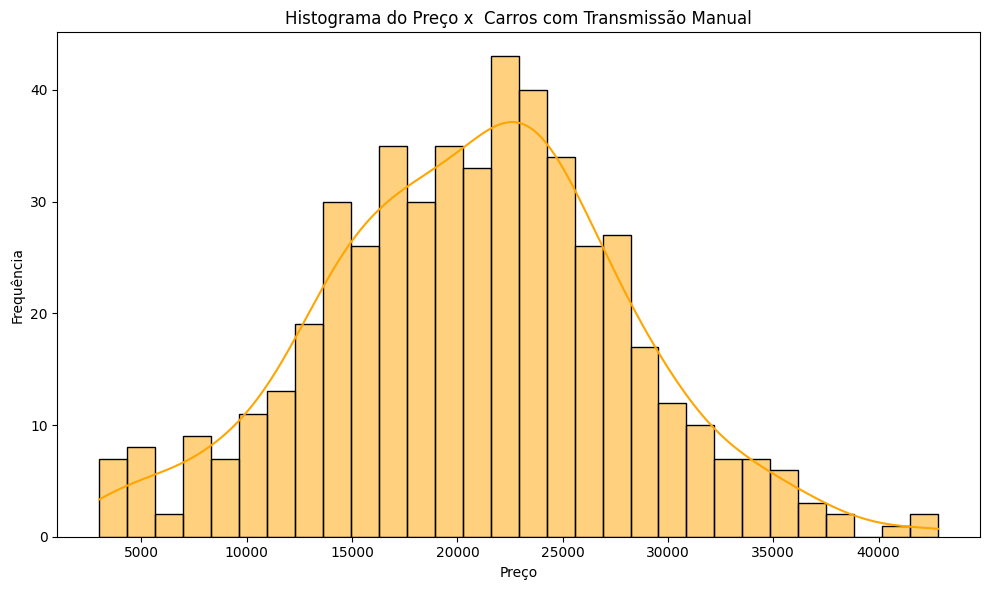

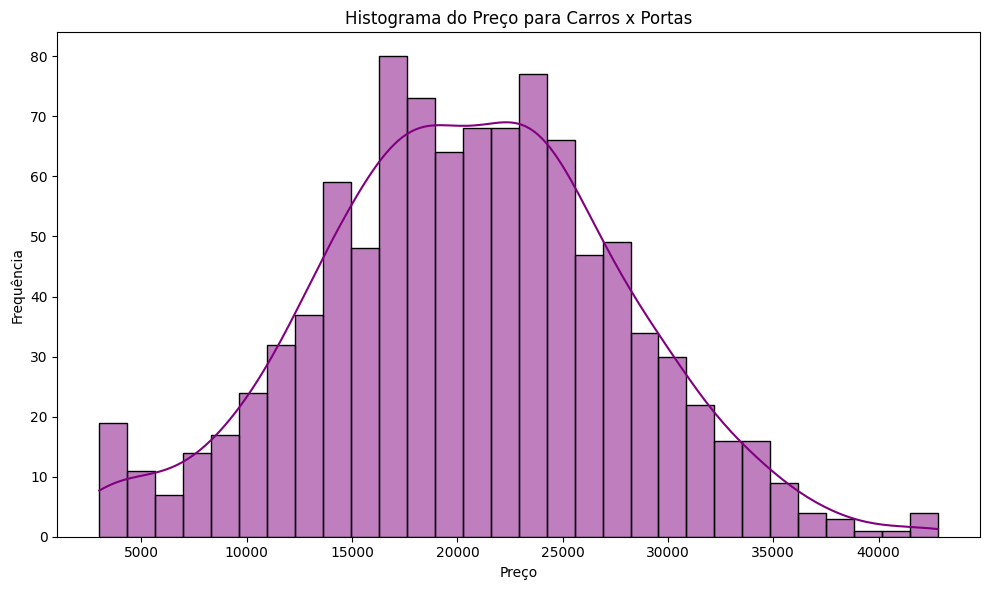

In [ ]:
# Histograma para os carros Chevrolet
plt.figure(figsize=(10, 6))
sns.histplot(df_chevrolet['price'], kde=True, color='lightblue', bins=30)
plt.title('Histograma do Preço x Carros Chevrolet')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Histograma para os carros Elétricos
plt.figure(figsize=(10, 6))
sns.histplot(df_eletric['price'], kde=True, color='lightgreen', bins=30)
plt.title('Histograma do Preço x Carros Elétricos')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Histograma para os carros Brancos
plt.figure(figsize=(10, 6))
sns.histplot(df_white['price'], kde=True, color='lightpink', bins=30)
plt.title('Histograma do Preço x Carros Brancos')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Histograma para os carros com transmissão Manual
plt.figure(figsize=(10, 6))
sns.histplot(df_manual['price'], kde=True, color='orange', bins=30)
plt.title('Histograma do Preço x  Carros com Transmissão Manual')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Histograma para os carros x de portas
plt.figure(figsize=(10, 6))
sns.histplot(df_doors['price'], kde=True, color='purple', bins=30)
plt.title('Histograma do Preço para Carros x Portas')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

## Gráficos de dispersão (stripplot)

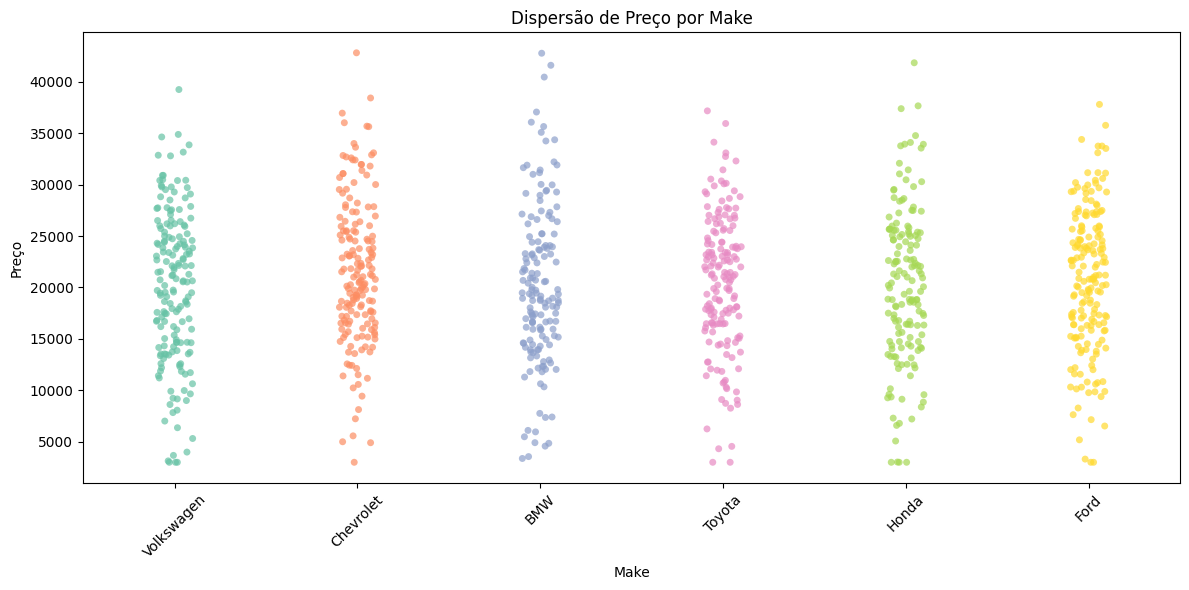

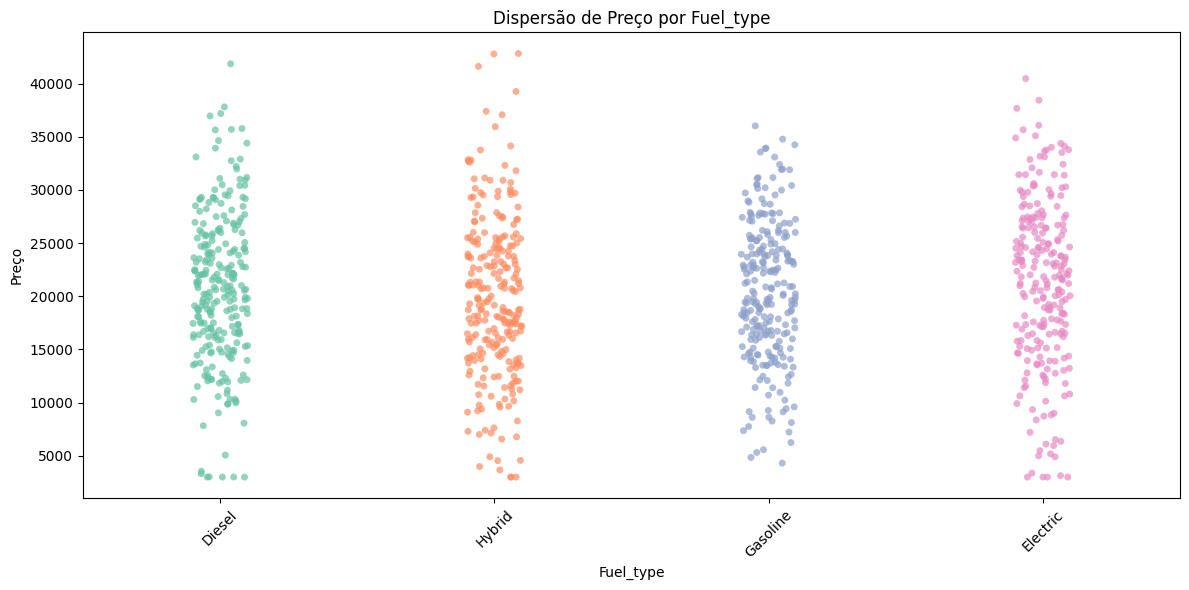

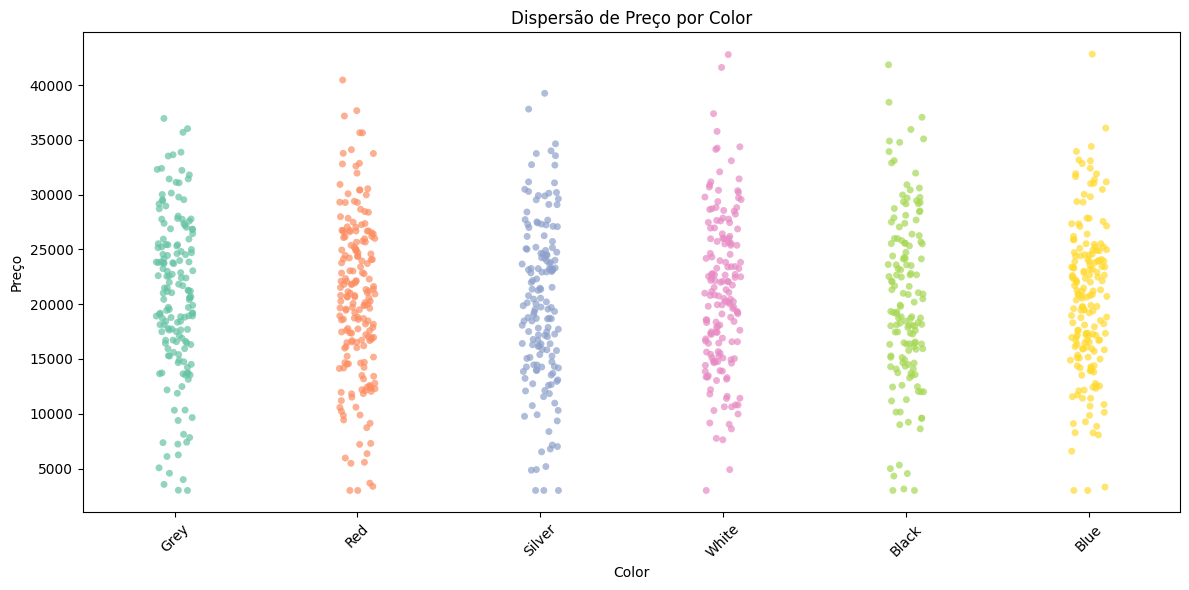

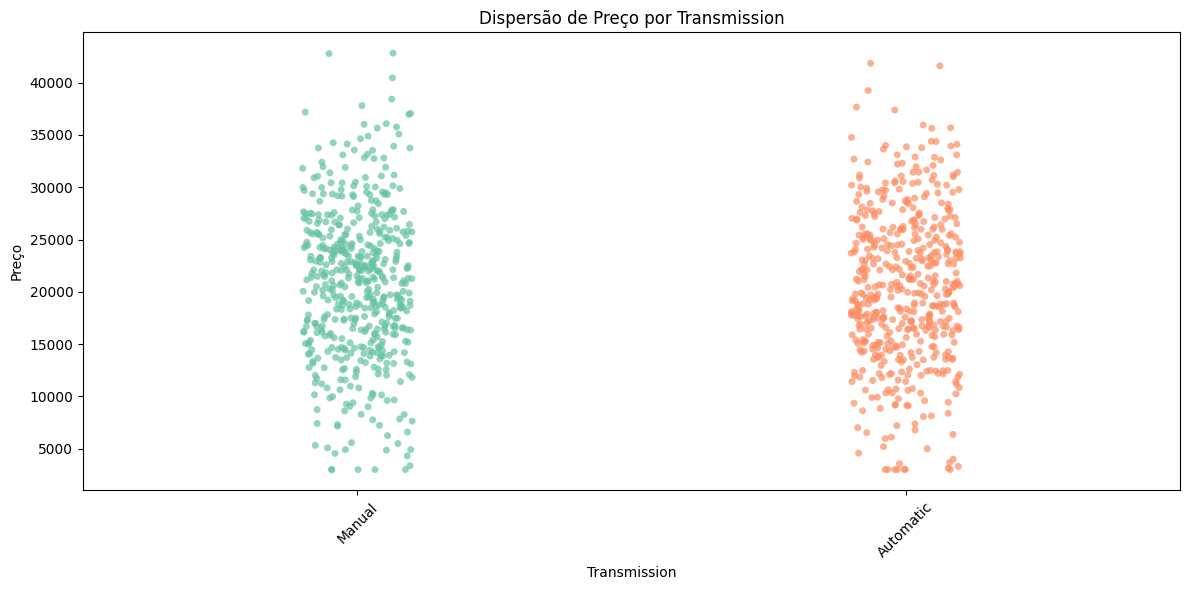

Text(0, 0.5, 'Preço')

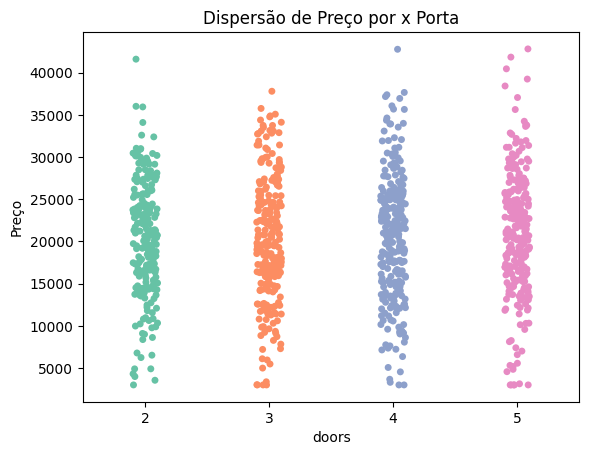

In [ ]:
for var in variaveis:
    plt.figure(figsize=(12, 6))
    sns.stripplot(data=df_carros, x=var, y='price', jitter=True, palette='Set2', alpha=0.7)
    plt.title(f'Dispersão de Preço por {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Preço')
    plt.xticks(rotation=45)  # Gira os rótulos se houver muitas categorias
    plt.tight_layout()
    plt.show()

sns.stripplot(data=df_carros, x='doors', y='price', jitter=True, palette='Set2')
plt.title('Dispersão de Preço por x Porta')
plt.xlabel('doors')
plt.ylabel('Preço')

## Graficos de dispersão (violinplot)

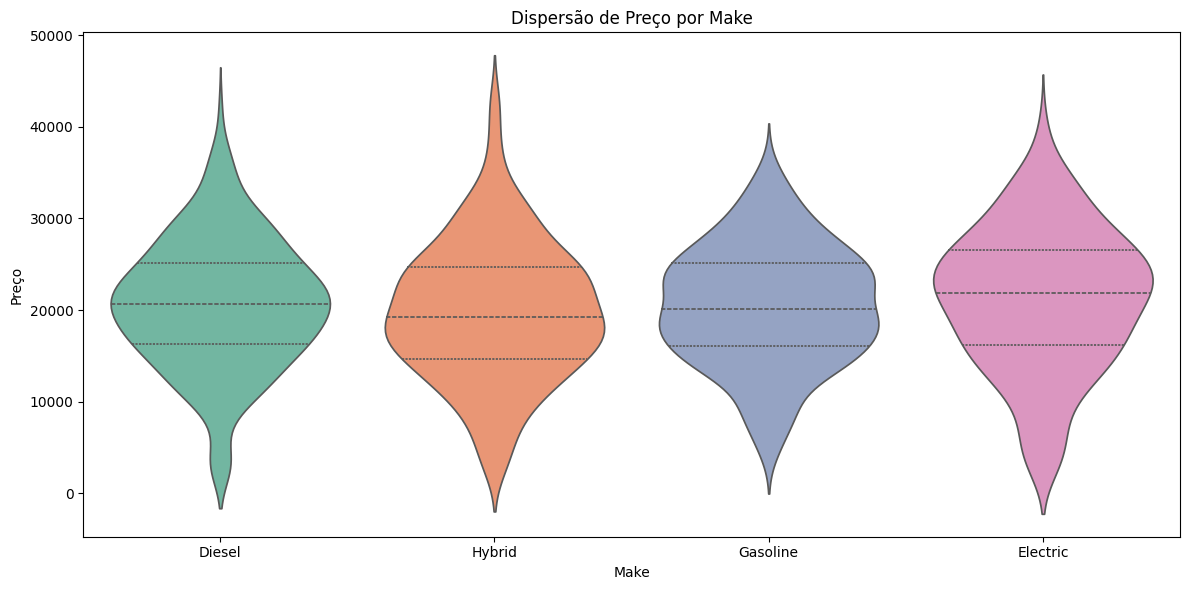

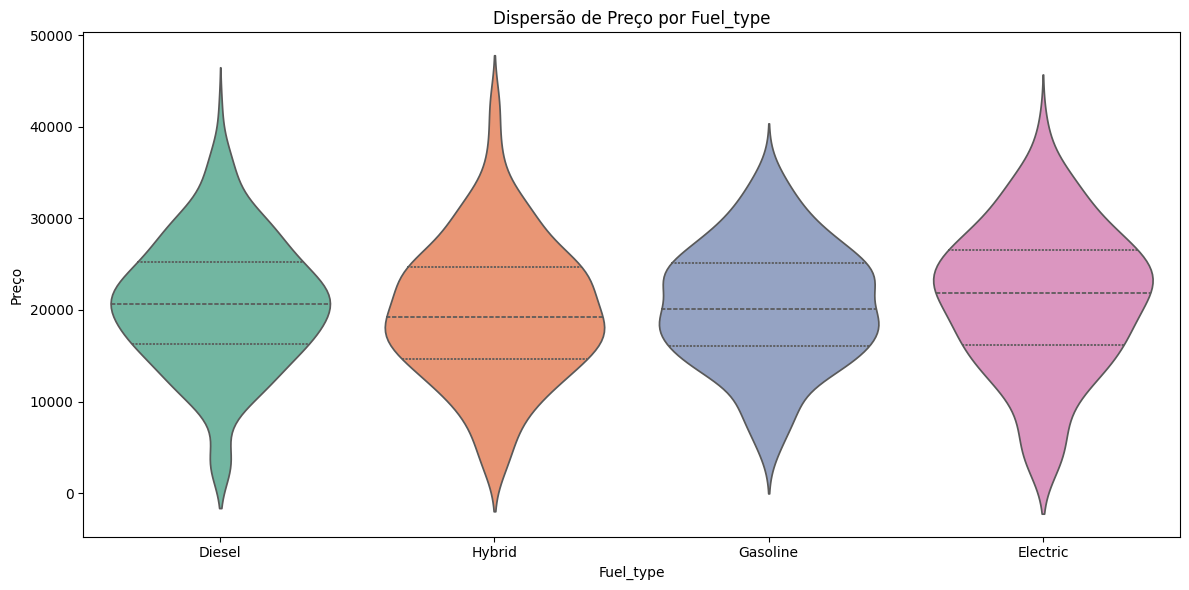

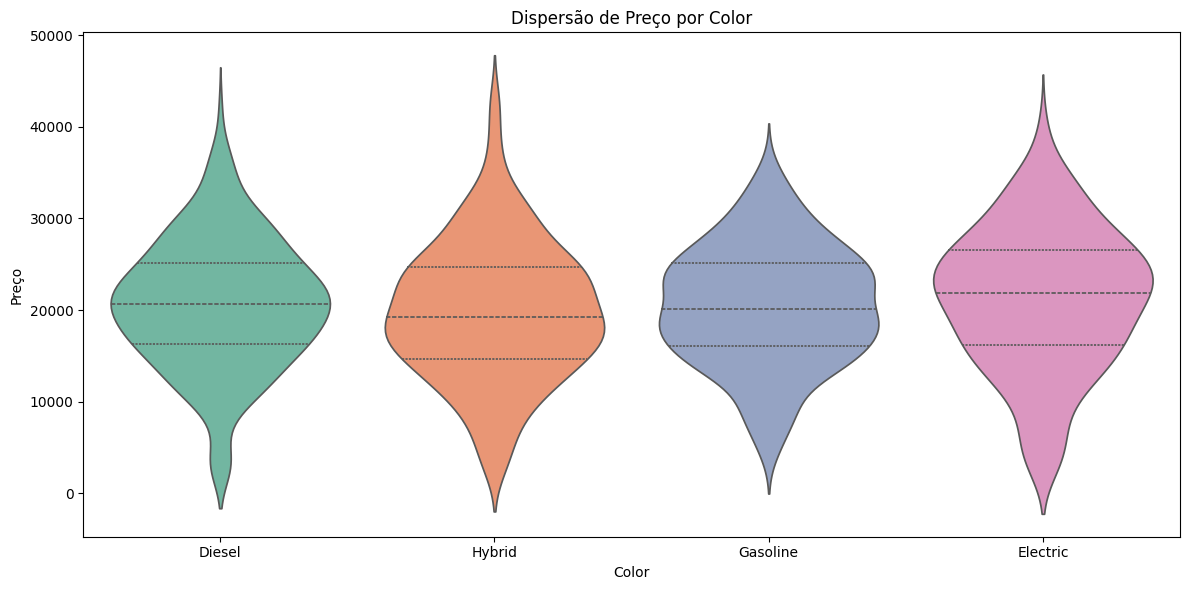

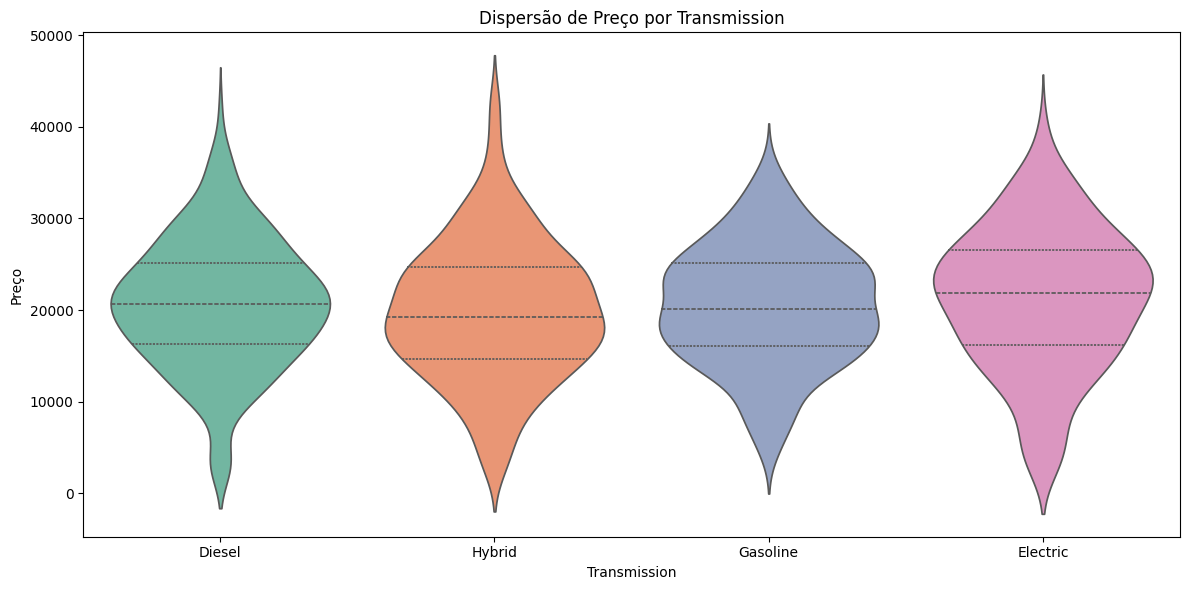

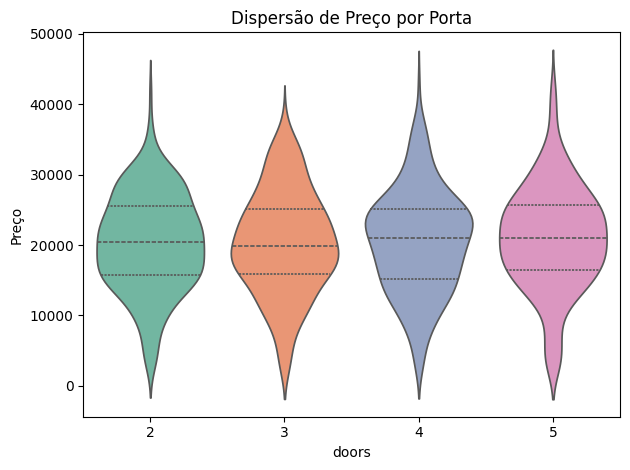

In [ ]:
for var in variaveis:
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df_carros, x='fuel_type', y='price', palette='Set2', inner='quartile')
    plt.title(f'Dispersão de Preço por {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Preço')

    plt.tight_layout()
    plt.show()



sns.violinplot(data=df_carros, x='doors', y='price', palette='Set2', inner='quartile')
plt.title(f'Dispersão de Preço por Porta')
plt.xlabel('doors')
plt.ylabel('Preço')
plt.tight_layout()
plt.show()

In [ ]:
categorical_vars = ['make', 'fuel_type', 'color', 'transmission']

In [ ]:
#Codificação das variáveis categóricas
df_encoded_cat = pd.get_dummies(df_carros[categorical_vars], drop_first=True).astype(int)

## Regressao linear simples

In [ ]:
### importa o pacote
import statsmodels.api as sm


# Definindo variáveis explicativas
X = df_encoded[['make_Chevrolet', 'fuel_type_Electric', 'color_White', 'transmission_Manual']]

# Adicionando a coluna 'doors' ao X
X['doors'] = df_carros['doors']

# Adicionando uma constante
X = sm.add_constant(X.astype(float))

# Definindo a variável dependente (preço)
y = df_carros['price'].astype(float)

# Ajustando o modelo OLS
model = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.922
Date:                Mon, 05 May 2025   Prob (F-statistic):             0.0881
Time:                        18:44:57   Log-Likelihood:                -10301.
No. Observations:                1000   AIC:                         2.061e+04
Df Residuals:                     994   BIC:                         2.064e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.909e+04    

In [ ]:
# Lista das variáveis
vars_list = ['make_Chevrolet', 'fuel_type_Electric', 'color_White', 'transmission_Manual']

# Loop para rodar OLS para cada variável
for var in vars_list:
    # Definindo a variável explicativa (adicionando a constante)
    X = sm.add_constant(df_encoded[[var]].astype(float))

    # Definindo a variável dependente (preço)
    y = df_carros['price'].astype(float)

    # Ajustando o modelo OLS
    model = sm.OLS(y, X).fit()

    # Exibindo o resumo do modelo
    print(f"Resumo para {var}:")
    print(model.summary())
    print("\n" + "="*80 + "\n")

Resumo para make_Chevrolet:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.054
Date:                Mon, 05 May 2025   Prob (F-statistic):             0.0443
Time:                        18:25:49   Log-Likelihood:                -10304.
No. Observations:                1000   AIC:                         2.061e+04
Df Residuals:                     998   BIC:                         2.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           

In [ ]:
# Rodando o modelo apenas para a variável 'doors'
X_doors = sm.add_constant(df_carros[['doors']].astype(float))  # Usando a coluna 'doors' diretamente do df_carros
y_doors = df_carros['price'].astype(float)

# Ajustando o modelo OLS para a variável 'doors'
model_doors = sm.OLS(y_doors, X_doors).fit()

# Exibindo o resumo do modelo para 'doors'
print("Resumo para a variável 'doors':")
print(model_doors.summary())
print("="*80)

Resumo para a variável 'doors':
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.108
Date:                Mon, 05 May 2025   Prob (F-statistic):              0.293
Time:                        18:25:39   Log-Likelihood:                -10306.
No. Observations:                1000   AIC:                         2.062e+04
Df Residuals:                     998   BIC:                         2.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.975e+0

## Regressao multipla com eliminacao recursiva

In [ ]:
#Seleção das variáveis
numerical_vars = ['year', 'mileage', 'engine_size', 'doors', 'tax','mpg']
categorical_vars = ['make', 'fuel_type', 'color', 'transmission']

In [ ]:
# Combinar todas as features numericas e categoricas
X = pd.concat([df_carros[numerical_vars], df_encoded_cat], axis=1)
y = df_carros['price']

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Adicionando constante (intercepto)
X = sm.add_constant(X)

# Rodando o modelo
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7186
Date:                Mon, 05 May 2025   Prob (F-statistic):              0.810
Time:                        16:53:43   Log-Likelihood:                -10299.
No. Observations:                1000   AIC:                         2.064e+04
Df Residuals:                     979   BIC:                         2.074e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.125e+05   8

 - R-squared = 0.014 - Isso significa que apenas 1,4% da variação do preço dos carros é explicada pelo modelo. É um valor muito baixo, indicando que o modelo não está explicando bem os dados.

 - Prob (F-statistic) = 0.810 → Altamente não significativa. Isso quer dizer que como um todo, o modelo não é estatisticamente significativo.

 - A maioria das variáveis tem valores de p (P>|t|) muito acima de 0.05, o que indica que não são estatisticamente significativas individualmente para explicar o preço.

## Eliminação recursiva de variáveis

In [ ]:
##### defindo a  funcao para eliminacao recursiva das variaveis explicativas com base no p-valor
def OLS_RFE(X, y, threshold=0.05):
    while True:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > threshold:
            remove_feature = p_values.idxmax()
            X = X.drop(remove_feature, axis=1)
        else:
            break
    return model, X.columns

A funcao OLS_RFE (Mínimos Quadrados Ordinários) - Método estatístico usado para ajustar modelos de regressão linear.
- Ajusta um modelo de regressão OLS com todas as variáveis.
- Verifica os p-valores de cada variável.
- Remove a variável com o maior p-valor se for maior que o threshold (por padrão, 0.05).
- Repete até que todas as variáveis restantes tenham p-valor menor ou igual a 0.05.
- Retorna o modelo final e o conjunto de variáveis explicativas restantes.

In [ ]:
#### aplicando a funcao e print da tabela de regressao
X = pd.concat([df_carros[numerical_vars], df_encoded_cat], axis=1).astype(int)
y = df_carros['price']

final_model, selected_features = OLS_RFE(X, y)
print("Variáveis selecionadas:", selected_features)
print("Tabela de Regressao:")
print(final_model.summary())

Variáveis selecionadas: Index(['year', 'make_Chevrolet'], dtype='object')
Tabela de Regressao:
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              4028.
Date:                Mon, 05 May 2025   Prob (F-statistic):                        0.00
Time:                        16:58:37   Log-Likelihood:                         -10304.
No. Observations:                1000   AIC:                                  2.061e+04
Df Residuals:                     998   BIC:                                  2.062e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef

- O resultado de regressão OLS mostra um modelo muito mais ajustado do que o anterior.
- R-squared (sem intercepto): 0.890 (modelo está bem ajustado aos dados) - Indicando que 89% da variação nos preços (price) é explicada pelas variáveis year e make_Chevrolet.

- Variáveis:
    - Year: coeficiente = 10.089, p-valor = 0.000
        - Significativo. Cada aumento de 1 unidade no year está associado a um aumento médio de 10,09 unidades no preço.
    - make_Chevrolet: coeficiente = 1217.65, p-valor = 0.045
        - Também significativo. Indica que, em média, um carro da Chevrolet tem R$ 1.217,65 a mais no preço do que os carros de outras marcas (referência).

- F-statistic: 4028, p-valor = 0.000
  - Indica que o modelo como um todo é estatisticamente significativo.

- Preço previsto pelo modelo :
    - Ŷ = β1 * year + β2 * make_chevrolet (0 ou 1)

    - Price = 10.089 * year + 1217,65 * make_chevrolet

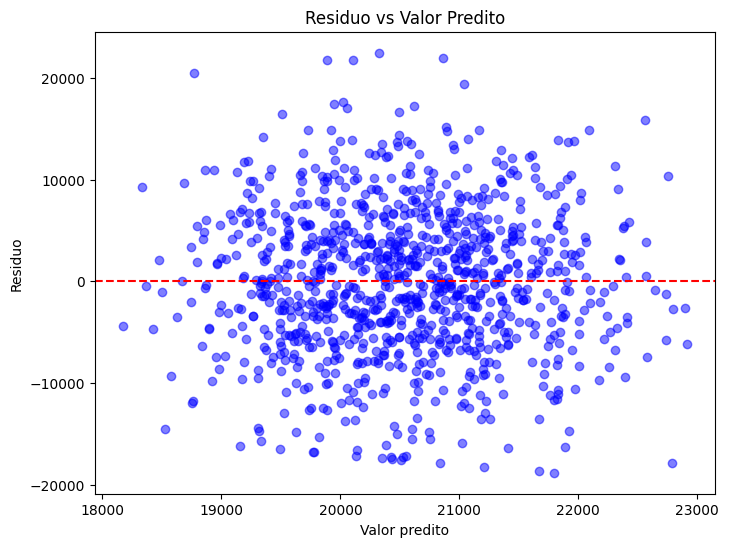

In [ ]:
# salva o dado do resíduo
residuals = model.resid
# calcula ovalor predito
predicted_values = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='blue', alpha=0.5)

# adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

# titulos
plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()

Temos os resíduos de forma aleatórios (sem padrão), indicando que o modelo é bem ajustado